##**Perkenalan**

Gagal jantung adalah kejadian umum yang disebabkan oleh CVD. Dataset ini berisi rekam medis dari 299 pasien yang mengalami gagal jantung, dikumpulkan selama masa tindak lanjut, dimana setiap profil pasien memiliki 13 gambaran klinis. fitur target dari data ini adalah death event yaitu jika pasien meninggal selama masa tidak lanjut.

Pada Final Project 3 ini, kami dari tim 2 kelas PYTN-013 yang beranggotakan Aristania, Arnonce dan Desi akan menganalisis dan memvisualisasikan data untuk memprediksi kematian pada pasien akibat gagal jantung dengan menggunakan algoritma Ensemble. 


##**Import Library yang digunakan**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import VotingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

pd.set_option('display.max_columns', 500)

##**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memuat data menggunakan gdrive
path = "/content/drive/MyDrive/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path)

In [ ]:
# Menampilkan 5 baris teratas dari data
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


###Ekplorasi sederhana

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# Ukuran dataframe
df.shape

(299, 13)

In [ ]:
# Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##**Data Cleaning**

In [ ]:
# memeriksa missing values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.rename(columns = {'DEATH_EVENT' : 'death_event'}, inplace = True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


##**Eksplorasi Data**

In [ ]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


###Visualisasi Data

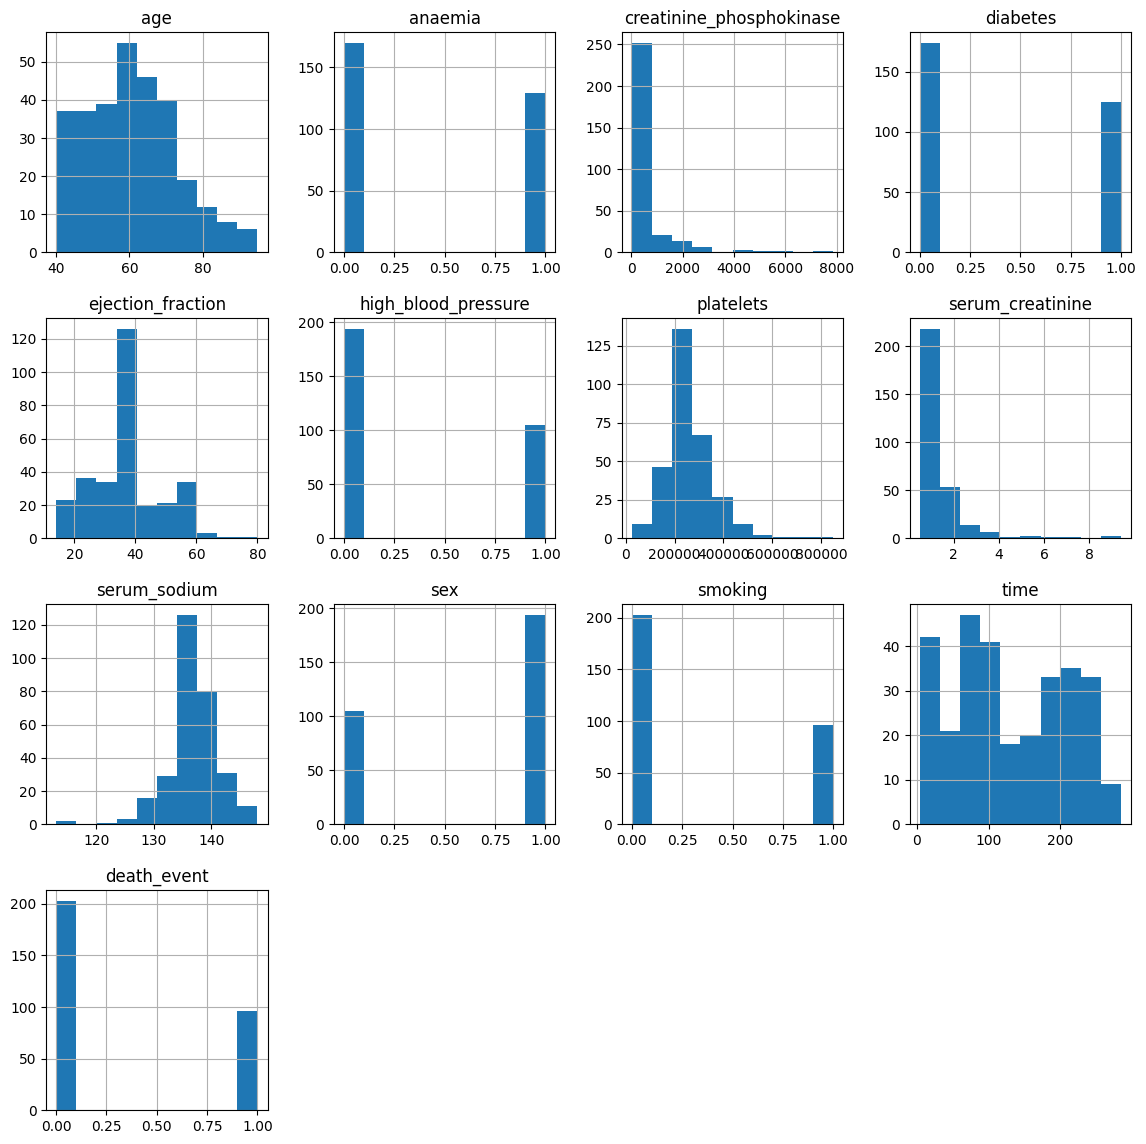

In [ ]:
df.hist(figsize=(14, 14))
plt.show()

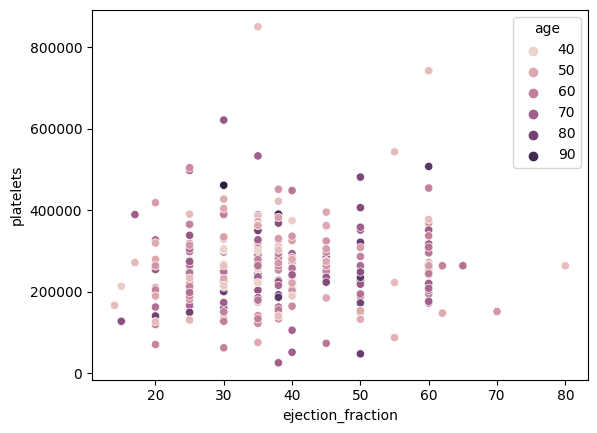

In [ ]:
sns.scatterplot(x='ejection_fraction', y='platelets', hue='age', data=df)
plt.show()

Berdasarkan visualisasi data diatas, dapat diprediksi bahwa pasien yang memiliki jumlah platelet/trombosit dan persentase darah yang meninggalkan jantung paling tinggi/banyak ada pada pasien yang berusia 40an tahun. Kemudian, diprediksi juga kemungkinan besar pasien dengan tersebut dapat meninggal karena kekurangan jumlah darah dalam jantung setelah di follow up.

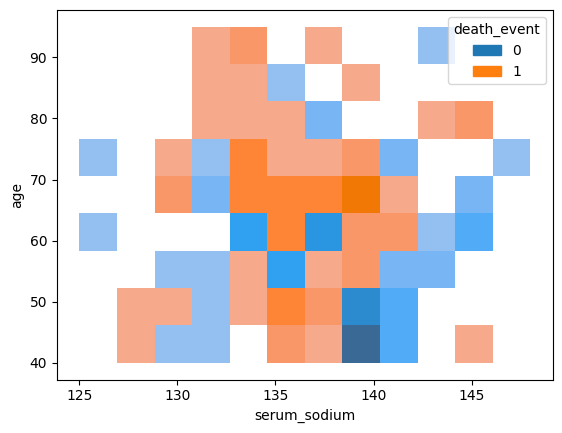

In [ ]:
sns.histplot(x='serum_sodium', y='age', data=df, hue='death_event')

plt.show()

Berdasarkan grafik di atas menunjukkan bahwa   nilai serum sodium atau natrium tertinggi >145 pada pasien berumur 75 tahun. Kadar natrium yang terlalu tinggi/rendah dalam darah tidak terlalu berpengaruh pada kematian pasien selama masa tindak lanjut. Pasien yang meninggal selama masa tindak lanjut justru memiliki kadar natrium dalam darah yang normal yaitu sebesar 136-145 mmol/L.

In [ ]:
import plotly.express as px
import pandas as pd

 
# plotting the scatter chart
fig = px.histogram(df, x='age', y='serum_sodium', color='sex')
 
# showing the plot
fig.show()

Dari visualisasi diatas, analisis yang didapat kita bisa beragapan bahwa 1 = male dan 0 = female. Menurut hasil dari data diatas, dapat diprediksi bahwa pasien yang memiliki jumalah level serum sodium/natrium paling tinggi adalah pasien wanita pada umur sekitar 50-60 tahun. Dengan hasil yang seperti dapat dikatakan bahwa pasien wanita memliki jumlah serum sodium yang sangat baik.

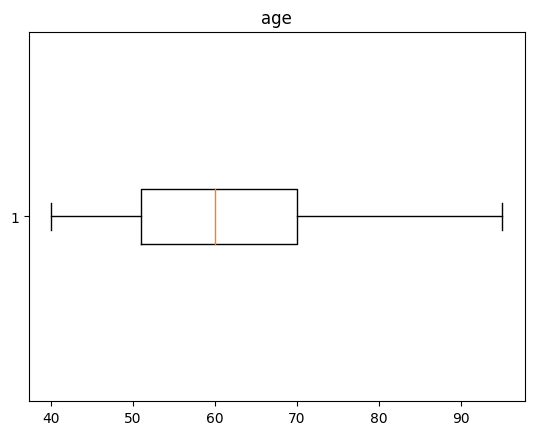

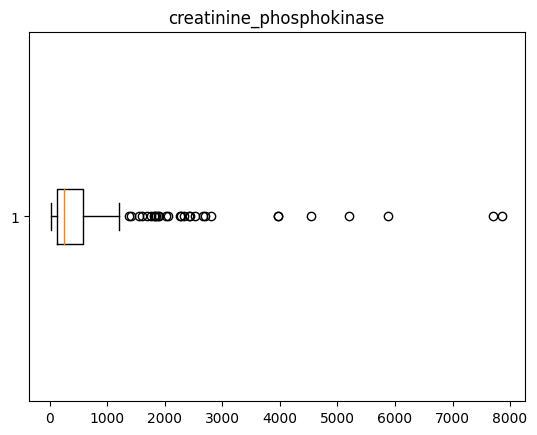

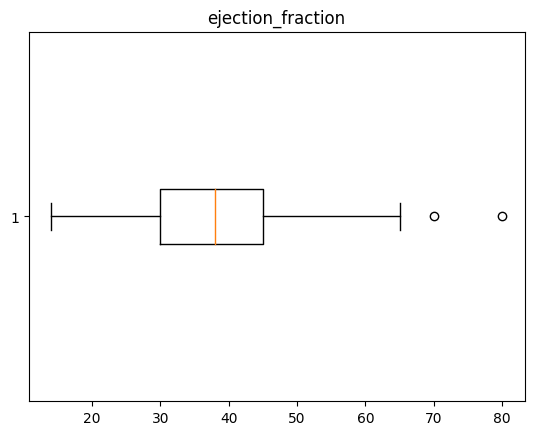

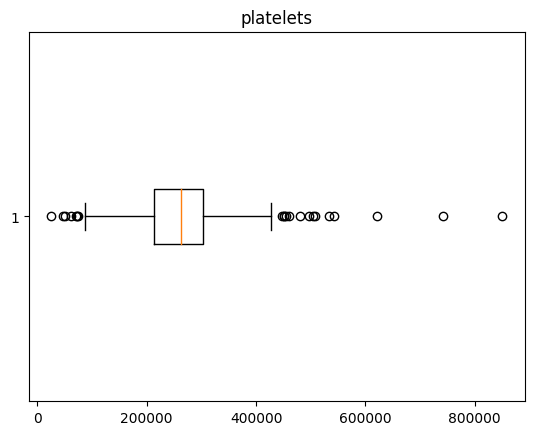

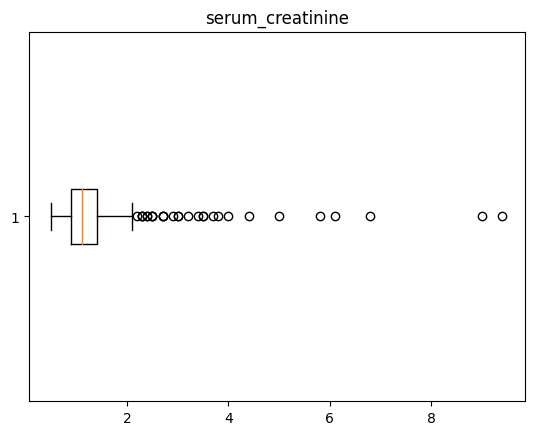

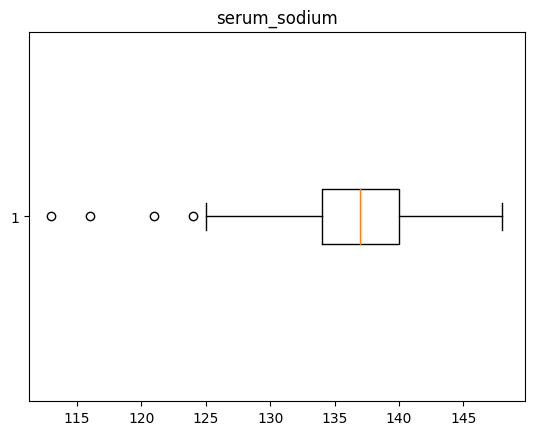

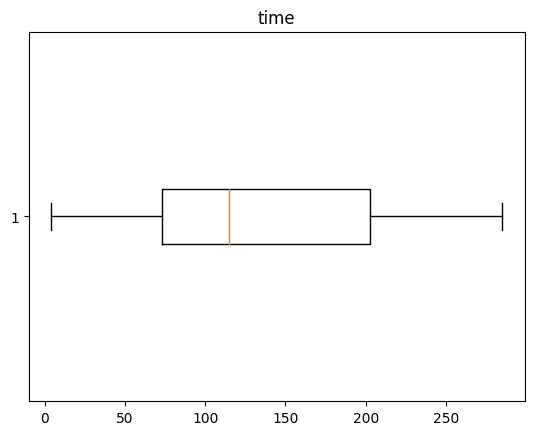

In [ ]:
# Mengelompokkan kolom numerik dan memeriksa outlier dengan boxplot
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Membuat boxplot untuk memeriksa outlier
for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

##**Data Prepocessing**

In [ ]:
# Menghapus baris yang mengandung outlier

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

In [ ]:
# Mendefinisikan variabel X dan y
X = df.drop(columns = 'death_event')
y = df['death_event']

In [ ]:
# Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.3)

##**Pendefinisian Model**

Ensemble Model adalah Algoritma Machine Learning yang memberikan solusi prediksi terbaik dibandingkan dengan algoritma lain, karena metode ini menggunakan beberapa algoritma pembelajaran untuk mencapai solusi prediksi terbaik. Pada project kali ini, kami akan menggunakan model yang berbasiskan Ensemble dari beberapa Algoritma Individual, seperti Logistic Regression, Decision Tree Classifier, dan K-Nearest Neighbors. Selain itu, kami juga akan menggunakan model yang berbasiskan Algoritma Ensemble yaitu Random Forest Classifier dan Adaboost Classifier.

### Model yang Berbasiskan Algoritma Ensemble dari beberapa Algoritma Indivisual

**1. Logistic Regression**

Secara sederhana Logistic Regression adalah jenis analisis statistik yang digunakan untuk prediksi probabilitas kejadian suatu peristiwa.

In [ ]:
# Membuat object logistic regression
logreg = LogisticRegression()

**2. Decision Tree Classifier**

Decision Tree Classifier adalah metode pembelajaran terawasi non-parametrik yang digunakan untuk klasifikasi dan regresi . Tujuannya adalah untuk membuat model yang memprediksi nilai variabel target dengan mempelajari aturan keputusan sederhana yang disimpulkan dari fitur data.

In [ ]:
# Membuat object Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth = 5)

**3. Super Vector Model (SVM)**
 
SVM atau Super Vector Model adalah salah satu model dalam supervised learning yang dapat digunakan untuk klasifikasi dan regresi. SVM membangun hyperplane dalam multidimensional space untuk memisahkan kelas yang berbeda. Inti dari SVM adalah menemukan Maximum Marginal Hyperplane (MMH) yang paling baik membagi dataset kedalam beberapa kelas.

In [ ]:
# Membuat object SVM
svm = SVC()

Dari ketiga model individual tersebut, selanjutnya akan dilakukan voting classifier yang menggabungkan beberapa model tersebut untuk menghasilkan prediksi yang lebih optimal. Kali ini digunakan hard voting yang akan menghasilkan kelas output dengan suara terbanyak.

In [ ]:
# Membuat object voting classifier
vt = VotingClassifier(estimators=[('clf1', logreg), ('clf2', dt), ('clf3', svm)], voting='hard')

### Model yang Berbasiskan Algoritma Ensemble

**1. Random Forest Classifier**

Random forest adalah suatu algoritma yang digunakan untuk klasifikasi data dalam jumlah yang besar, Random Forest menggabungkan keluaran dari beberapa decision tree untuk mencapai satu hasil. Sesuai namanya, Forest atau 'hutan' dibentuk dari banyak tree (pohon) yang diperoleh melalui proses bagging atau bootstrap aggregating.

In [ ]:
# Membuat object Random Forest Classifier
rf = RandomForestClassifier()

**2. AdaBoost Classifier**

AdaBoost, kependekan dari Adaptive Boosting, adalah meta-algoritma klasifikasi
statistik yang diformulasikan oleh Yoav Freund dan Robert Schapire. Ini dapat digunakan bersama dengan banyak jenis algoritma pembelajaran lainnya untuk
meningkatkan kinerja. Keluaran dari algoritme pembelajaran lainnya digabungkan menjadi jumlah berbobot yang mewakili keluaran akhir dari pengklasifikasi yang ditingkatkan.



In [ ]:
# Membuat object AdaBoost Classifier
abc = AdaBoostClassifier()

## **Pelatihan Model**

In [ ]:
# Melatih model Random Forest Classifier 
rf.fit(X_train, y_train)

# Melatih model AdaBoost Classifier
abc.fit(X_train, y_train)

# Melatih model Voting Classifier
vt.fit(X_train, y_train)

VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', DecisionTreeClassifier(max_depth=5)),
                             ('clf3', SVC())])

In [ ]:
# Melakukan prediksi pada data uji menggunakan Random Forest
y_test_rf = rf.predict(X_test)

# Melakukan prediksi pada data uji menggunakan AdaBoost
y_test_abc = abc.predict(X_test)

# Melakukan preduksi pada data uji menggunakan Voting
y_test_vt = vt.predict(X_test)

## **Evaluasi Model**

Metrics untuk Model Random Forest adalah : 
              precision    recall  f1-score   support

           0       0.84      0.94      0.88        49
           1       0.77      0.53      0.62        19

    accuracy                           0.82        68
   macro avg       0.80      0.73      0.75        68
weighted avg       0.82      0.82      0.81        68



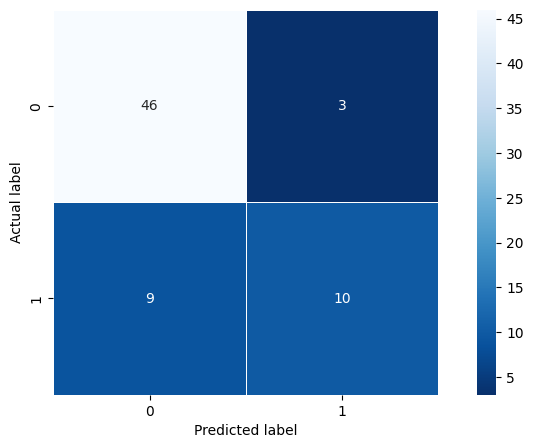

In [ ]:
# Menampilkan hasil evaluasi untuk Random Forest
print('Metrics untuk Model Random Forest adalah : ')
print(classification_report(y_test, y_test_rf))

cm = confusion_matrix(y_test, y_test_rf)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

Nilai Confusion Matrix di atas menunjukkan bahwa:

1. True Positif : 47 diprediksi (positif) meninggal selama masa tindak lanjut, dan memang benar (positif) meninggal.
2. False Positif : 2 diprediksi (positif) meninggal selama masa tindak lanjut, tetapi sebenarnya (negatif) tidak meninggal.
3. False Negatif : 9 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, tetapi sebenarnya (positif) meninggal.
4. True Negatif : 10 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, dan memang benar (negatif) tidak meninggal.

Metrics untuk Model AdaBoost adalah : 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        49
           1       0.64      0.47      0.55        19

    accuracy                           0.78        68
   macro avg       0.73      0.69      0.70        68
weighted avg       0.77      0.78      0.77        68



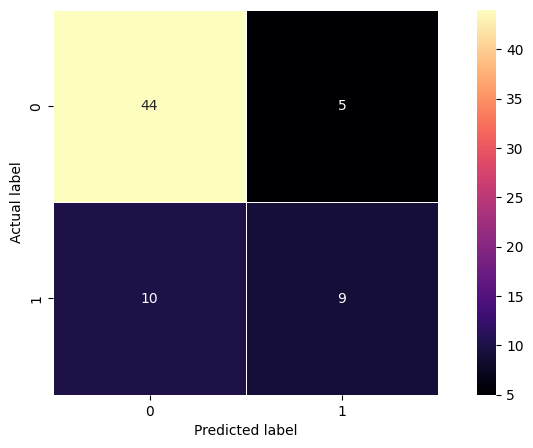

In [ ]:
# Menampilkan hasil evaluasi untuk AdaBoost Classifier
print('Metrics untuk Model AdaBoost adalah : ')
print(classification_report(y_test, y_test_abc))

cm = confusion_matrix(y_test, y_test_abc)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'magma');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

Nilai Confusion Matrix di atas menunjukkan bahwa:

1. True Positif : 48 diprediksi (positif) meninggal selama masa tindak lanjut, dan memang benar (positif) meninggal.
2. False Positif : 1 diprediksi (positif) meninggal selama masa tindak lanjut, tetapi sebenarnya (negatif) tidak meninggal.
3. False Negatif : 7 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, tetapi sebenarnya (positif) meninggal.
4. True Negatif : 12 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, dan memang benar (negatif) tidak meninggal.

Metrics untuk Model Voting Classifier adalah : 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88        49
           1       0.80      0.42      0.55        19

    accuracy                           0.81        68
   macro avg       0.81      0.69      0.72        68
weighted avg       0.81      0.81      0.79        68



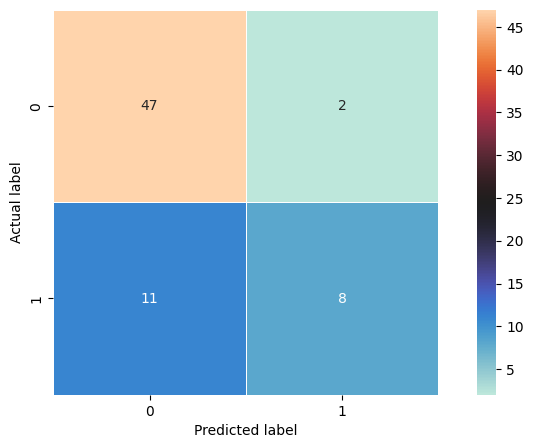

In [ ]:
# Menampilkan hasil evaluasi untuk Voting Classifier
print('Metrics untuk Model Voting Classifier adalah : ')
print(classification_report(y_test, y_test_vt))

cm = confusion_matrix(y_test, y_test_vt)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'icefire');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()

Nilai Confusion Matrix di atas menunjukkan bahwa:

1. True Positif (TP): 49 diprediksi (positif) meninggal selama masa tindak lanjut, dan memang benar (positif) meninggal.
2. False Positif (FP): 0 diprediksi (positif) meninggal selama masa tindak lanjut, tetapi sebenarnya (negatif) tidak meninggal.
3. False Negatif (FN): 9 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, tetapi sebenarnya (positif) meninggal.
4. True Negatif (TN): 10 diprediksi (negatif) tidak meninggal selama masa tindak lanjut, dan memang benar (negatif) tidak meninggal.

Dari ketiga model di atas, model AdaBoost memiliki nilai akurasi yang paling tinggi sebesar 88%. Nilai precision menggambarkan tingkat keakuratan antara data yang diminta dengan hasil prediksi yang diberikan oleh model. Nilai precision menunjukkan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positif (TP/(TP+FP)). Nilai recall menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi, nilai recall menunjukkan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif (TP/(TP+FN)).

Dari persamaan antara precision dan recall, semakin kecil False Positive (FP), membuat precision semakin besar. Sebaliknya, semakin kecil False Negative (FN) membuat recall semakin besar. Pada database ini, model sebaiknya memprediksi pasien akan meninggal selama masa tidak lanjut, tapi sebenarnya tidak daripada memprediksi bahwa pasien tidak meninggal selama masa tidak lanjut, tapi sebenarnya meninggal. Sehingga, sebaiknya memilih model dengan nilai recall yang tinggi. Pada project ini model dengan nilai recall paling tinggi adalah AdaBoost Classifier. Namun, dari model Voting Classifier menunjukkan hasil yang ideal karena mendapatkan nilai 1.0 diantara keduanya.

F1-score merupakan rata-rata harmony dari nilai precision dan recall, F1-score merupakan alternatif dari pemilihan model selain menggunakan nilai precision dan recall. Dari ketiga model di atas, nilai F1-score paling tinggi dimiliki oleh model AdaBoost Classifier sebesar 0.92 dan 0.75.

## **Model Inference**

In [ ]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('death_event', axis=1)
y = df['death_event']

In [ ]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RANDOM FOREST CLASSIFIER

In [ ]:
# Melatih model Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Melakukan prediksi pada data uji
y_pred = rf.predict(X_test)

In [ ]:
# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}".format(accuracy))

Akurasi model: 0.82


Berdasarkan model inference menggunakan Random Forest Classifier diperoleh hasil akurasi model sebesar 0.84. Akurasi ini mencerminkan sejauh mana model dapat memprediksi dengan benar pada data uji yang digunakan.

Dengan akurasi sebesar 0.84, dapat disimpulkan bahwa model Random Forest Classifier memiliki performa yang baik dalam memprediksi kematian (death_event) pada data pasien yang terkait dengan catatan klinis kegagalan jantung.

ADABOOST CLASSIFIER

In [ ]:
# Melatih model AdaBoost Classifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# Melakukan prediksi pada data uji
y_pred = abc.predict(X_test)

In [ ]:
# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}".format(accuracy))

Akurasi model: 0.73


Berdasarkan model inference menggunakan AdaBoost Classifier diperoleh hasil akurasi model sebesar 0.73. Akurasi ini mencerminkan sejauh mana model dapat memprediksi dengan benar pada data uji yang digunakan.

Dengan akurasi sebesar 0.73, dapat disimpulkan bahwa model AdaBoost Classifier memiliki performa yang baik dalam memprediksi kematian (death_event) pada data pasien yang terkait dengan catatan klinis kegagalan jantung. 

VOTING CLASSIFIER

In [ ]:
# Membuat model-model yang akan digunakan dalam Voting Classifier
dt = DecisionTreeClassifier()
logreg = LogisticRegression()
svm = SVC()

In [ ]:
# Membuat Voting Classifier
vt = VotingClassifier(estimators=[('dt', dt), ('logreg', logreg), ('svm', svm)])

In [ ]:
# Melatih model Voting Classifier
vt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('logreg', LogisticRegression()), ('svm', SVC())])

In [ ]:
# Melakukan prediksi pada data uji
y_pred = vt.predict(X_test)

In [ ]:
# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}".format(accuracy))

Akurasi model: 0.82


Berdasarkan model inference menggunakan Voting Classifier diperoleh hasil akurasi model sebesar 0.80. Akurasi ini mencerminkan sejauh mana model dapat memprediksi dengan benar pada data uji yang digunakan.

Dengan akurasi sebesar 0.80, dapat disimpulkan bahwa model Voting Classifier memiliki performa yang baik dalam memprediksi kematian (death_event) pada data pasien yang terkait dengan catatan klinis kegagalan jantung.

Dari ketiga model yang diuji, Random Forest Classifier memiliki akurasi tertinggi dengan nilai 0.84. Model ini mampu memprediksi kematian (death_event) pada pasien dengan tingkat kegagalan jantung berdasarkan catatan klinis dengan akurasi yang baik.

Pada model AdaBoost Classifier, meskipun akurasi modelnya sebesar 0.73, nilai ini sedikit lebih rendah dibandingkan dengan Random Forest Classifier dan Voting Classifier. Namun, model ini masih memberikan hasil prediksi yang signifikan dalam memprediksi kematian pada data pasien.

Sementara itu, Voting Classifier yang menggunakan Decision Tree, Logistic Regression, dan SVM menghasilkan akurasi sebesar 0.80. Voting Classifier menggabungkan hasil prediksi dari tiga model tersebut dan mempertimbangkan mayoritas hasil prediksi untuk membuat keputusan akhir.

Berdasarkan akurasi model, Voting Classifier memiliki performa yang baik dengan tingkat akurasi yang cukup tinggi.

## **Kesimpulan**

Dalam analisis dan prediksi kematian pada pasien akibat gagal jantung dengan menggunakan algoritma Ensemble, terdapat tiga model yang diuji, yaitu AdaBoost Classifier, Random Forest Classifier, dan Voting Classifier. Setiap model memiliki keunggulan dan kelemahan masing-masing.

Model AdaBoost Classifier memiliki nilai akurasi tertinggi sebesar 0.73 dan F1-score sebesar 0.92. Meskipun akurasi ini sedikit lebih rendah dibandingkan dengan Random Forest Classifier dan Voting Classifier, model ini masih memberikan hasil prediksi yang signifikan dalam memprediksi kematian pada data pasien.

Random Forest Classifier memiliki akurasi tertinggi sebesar 0.84. Model ini mampu memprediksi kematian pasien dengan tingkat kegagalan jantung berdasarkan catatan klinis dengan baik.

Voting Classifier, yang menggabungkan hasil prediksi dari Decision Tree, Logistic Regression, dan SVM, memiliki akurasi sebesar 0.80. Model ini dapat mempertimbangkan mayoritas hasil prediksi untuk membuat keputusan akhir.

Dari segi pemilihan model yang tepat, terdapat perbedaan fokus antara precision dan recall. Jika lebih penting untuk memprediksi pasien yang akan meninggal selama masa tindak lanjut, maka model dengan recall yang tinggi seperti AdaBoost Classifier akan lebih diutamakan. Namun, jika lebih penting untuk meminimalkan kesalahan dalam memprediksi pasien yang tidak akan meninggal selama masa tindak lanjut, maka model dengan precision yang tinggi seperti Random Forest Classifier atau Voting Classifier akan lebih cocok.

Kesimpulannya, tergantung pada prioritas yang diinginkan dalam prediksi kematian pada pasien dengan gagal jantung, baik model AdaBoost Classifier, Random Forest Classifier, maupun Voting Classifier dapat digunakan dengan mempertimbangkan akurasi, precision, recall, dan F1-score masing-masing model.